<p>

<p>

<h1>Exploratory Data Analysis of the data set of <i>"Students Exam Scores: Extended Dataset"</i> </h1>

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<b> Importing libraries

<p>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<p>

<b>Reading the Dataset

<p>

In [2]:
df=pd.read_csv('student.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


<p>

<b>Checking if there's any null values column by column

<p>

In [3]:
for column in df.notnull().columns.values.tolist():
    print(column)
    print (df.notnull()[column].value_counts())
    print('')

Unnamed: 0
True    30641
Name: Unnamed: 0, dtype: int64

Gender
True    30641
Name: Gender, dtype: int64

EthnicGroup
True     28801
False     1840
Name: EthnicGroup, dtype: int64

ParentEduc
True     28796
False     1845
Name: ParentEduc, dtype: int64

LunchType
True    30641
Name: LunchType, dtype: int64

TestPrep
True     28811
False     1830
Name: TestPrep, dtype: int64

ParentMaritalStatus
True     29451
False     1190
Name: ParentMaritalStatus, dtype: int64

PracticeSport
True     30010
False      631
Name: PracticeSport, dtype: int64

IsFirstChild
True     29737
False      904
Name: IsFirstChild, dtype: int64

NrSiblings
True     29069
False     1572
Name: NrSiblings, dtype: int64

TransportMeans
True     27507
False     3134
Name: TransportMeans, dtype: int64

WklyStudyHours
True     29686
False      955
Name: WklyStudyHours, dtype: int64

MathScore
True    30641
Name: MathScore, dtype: int64

ReadingScore
True    30641
Name: ReadingScore, dtype: int64

WritingScore
True    306

<p>

<b>Checking the information about the columns

<p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


<p>

<b>Making a list of the columns that has null value

<p>

In [5]:
null_cols = df.loc[:, df.isnull().any()]
listof_null_columns=list(null_cols.columns)
listof_null_columns

['EthnicGroup',
 'ParentEduc',
 'TestPrep',
 'ParentMaritalStatus',
 'PracticeSport',
 'IsFirstChild',
 'NrSiblings',
 'TransportMeans',
 'WklyStudyHours']

<p>

<b>Making a list of column that has null value and data is <i>'object'

<p>

In [6]:
null_cols = df.select_dtypes(include='object').loc[:, df.isnull().any()]
listof_null_columns_obj = list(null_cols.columns)
listof_null_columns_obj

['EthnicGroup',
 'ParentEduc',
 'TestPrep',
 'ParentMaritalStatus',
 'PracticeSport',
 'IsFirstChild',
 'TransportMeans',
 'WklyStudyHours']

<p>

<b>Filling the value of null value for data type object</b><br>
As it is a catagorical value we can't really calculate mean so we will find out the frequency and replace the null value with it

<p>

In [7]:
for col in listof_null_columns_obj:
    freq=df[col].value_counts().idxmax()
    df[col].fillna(freq, inplace=True)

<p>

<b>Making a list of column that has null value and data is <i>'int64'

<p>

In [8]:
null_cols = df.select_dtypes(include='int64').loc[:, df.isnull().any()]
listof_null_columns_int = list(null_cols.columns)
listof_null_columns_int

[]

<p>

<b>Making a list of column that has null value and data is <i>'float64'

<p>

In [9]:
null_cols = df.select_dtypes(include='float64').loc[:, df.isnull().any()]
listof_null_columns_float = list(null_cols.columns)
listof_null_columns_float

['NrSiblings']

<p>

<b>Filling the null value of the column that has datatype <i>'float64'</i> with it's mean</b>
   

<p>

In [10]:
avg_val = df['NrSiblings'].mean(axis=0)
df['NrSiblings'].fillna(round(avg_val), inplace=True)

<p>

<b>Describing the basic statistics of the dataset parameter <i> "include='all'" </i> includes the variables that not a numerical variable

<p>

In [11]:
df.describe(include='all')

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,30641,30641,30641,30641,30641,30641,30641,30641,30641.000000,30641,30641,30641.000000,30641.000000,30641.000000
unique,NaN,2,5,6,2,2,4,3,2,NaN,2,3,NaN,NaN,NaN
top,NaN,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,10-May,NaN,NaN,NaN
freq,NaN,15424,11052,8478,19905,20686,18034,15844,19986,NaN,19279,17201,NaN,NaN,NaN
mean,499.556607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.138409,NaN,NaN,66.558402,69.377533,68.418622
std,288.747894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420707,NaN,NaN,15.361616,14.758952,15.443525
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,10.000000,4.000000
25%,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000,59.000000,58.000000
50%,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,67.000000,70.000000,69.000000
75%,750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,78.000000,80.000000,79.000000


<p>

Done with empty values....

<p>

<b>Just some small calculation

<p>

In [12]:
df['WklyStudyHours'].value_counts()

10-May    17201
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

<b>Fixing the wrong format of data

<p>

In [13]:
df['WklyStudyHours'].replace("10-May", '5-10',inplace=True)
df['WklyStudyHours']

0         < 5
1        5-10
2         < 5
3        5-10
4        5-10
         ... 
30636    5-10
30637    5-10
30638    5-10
30639    5-10
30640    5-10
Name: WklyStudyHours, Length: 30641, dtype: object

<b>Checking the correlation between numerical variable

<p>

In [14]:
co_re=df.corr()
co_re.iloc[1:,1:]

C:\Users\Digital Outlet\AppData\Local\Temp\ipykernel_4828\3092024657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_re=df.corr()


,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,-0.001084,-0.000796,-0.002375
MathScore,-0.001084,1.000000,0.817825,0.807118
ReadingScore,-0.000796,0.817825,1.000000,0.952584
WritingScore,-0.002375,0.807118,0.952584,1.000000


<b>Printing the columns of the data set

<p>

In [15]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

<b>Drawing the scattar plot with regration line

<b>

(0.0, 104.5)

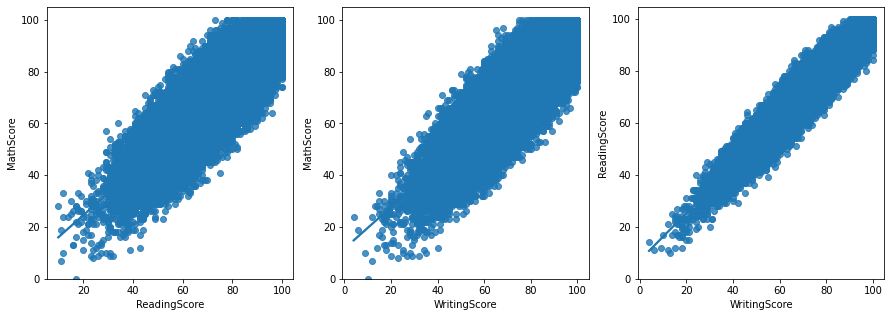

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x="ReadingScore", y="MathScore", data=df, ax=axes[0])
axes[0].set_ylim(0,)

sns.regplot(x="WritingScore", y="MathScore", data=df, ax=axes[1])
axes[1].set_ylim(0,)

sns.regplot(x="WritingScore", y="ReadingScore", data=df, ax=axes[2])
axes[2].set_ylim(0,)

<h5> Thought </h5>
<p>
As we can see in plot the relation between variables are perfectly correlated. The regression line intersets most of the data points. 

</p>

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Checking the value distribution of three scores</h5>

Text(0, 0.5, 'Score')

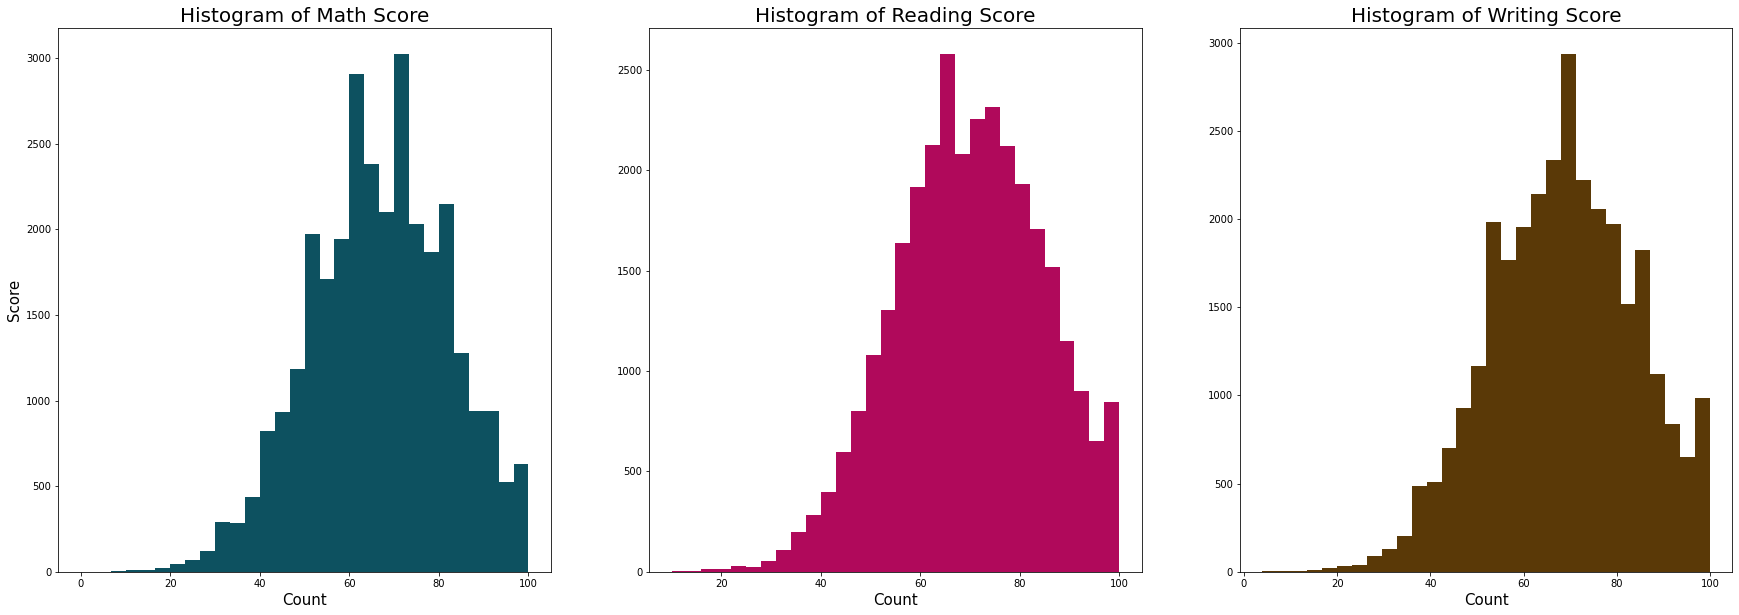

In [17]:
data1 = df["MathScore"]
data2 = df["ReadingScore"]
data3 = df["WritingScore"]


fig, axs = plt.subplots(1, 3, figsize=(30, 10))


axs[0].hist(data1, bins=30,color='#0d5160')
axs[1].hist(data2, bins=30,color="#b0095b")
axs[2].hist(data3, bins=30,color="#5a3907")


axs[0].set_title('Histogram of Math Score',fontsize=20)
axs[1].set_title('Histogram of Reading Score',fontsize=20)
axs[2].set_title('Histogram of Writing Score',fontsize=20)
axs[0].set_xlabel('Count',fontsize=15)
axs[1].set_xlabel('Count',fontsize=15)
axs[2].set_xlabel('Count',fontsize=15)
axs[0].set_ylabel('Score',fontsize=15)

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Now calculating the average scores out of three scores </h5>
<p> As we saw earlier from the correlation graph that the three scores are perfectly correlated with each other. That means if any student achieves a good result he did the same in other two.</p>

In [18]:
df['Total_avg_score']= (df['MathScore']+df['ReadingScore']+df['WritingScore'])/3
df['Total_avg_score']=df['Total_avg_score'].astype('int')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Total_avg_score
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,69,90,88,82
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5-10,45,56,42,47
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75,76


<h5> Now checking the value distribution of Average score </h5>

Text(0.5, 1.0, 'Distribution of Average Scores')

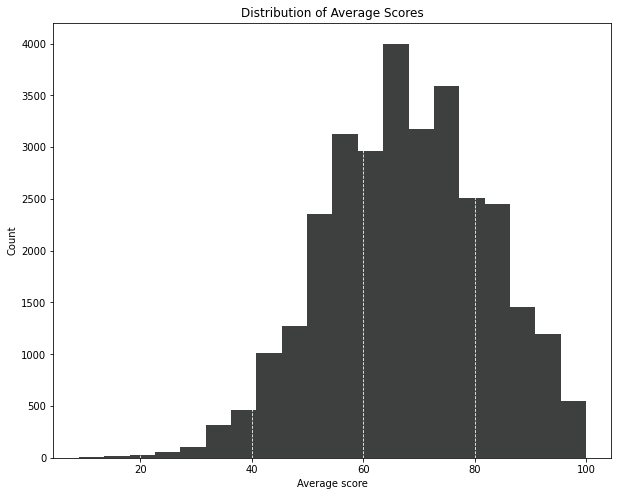

In [19]:
fig, axs = plt.subplots(figsize=(10, 8))
plt.hist(df['Total_avg_score'], bins=20, color='#3E3F3F')
plt.grid(axis='x',color='white',linestyle='--')
plt.xlabel('Average score')
plt.ylabel('Count')
plt.title('Distribution of Average Scores')

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Now we're binning the Average score.</h5>
<p> We're making three bins. The labels of the bins are: <i> Excellent, Good and not good. </i> 
    

In [20]:
bins = np.linspace(min(df['Total_avg_score']), max(df['Total_avg_score']), 4)
bins

array([  9.        ,  39.33333333,  69.66666667, 100.        ])

In [21]:
group_names = ['Not Good', 'Good', 'Excellent']

In [22]:
df['Score_status'] = pd.cut(df['Total_avg_score'], bins, labels=group_names, include_lowest=True )
df[['Total_avg_score','Score_status']].head(20)

,Total_avg_score,Score_status
0,72,Excellent
1,82,Excellent
2,90,Excellent
3,47,Good
4,76,Excellent
5,78,Excellent
6,89,Excellent
7,41,Good
8,65,Good
9,48,Good


<p>

<h5> Now we're checking the the distribution of thos bins </h5>

Text(0.5, 1.0, 'Binned Distribution of Average Scores')

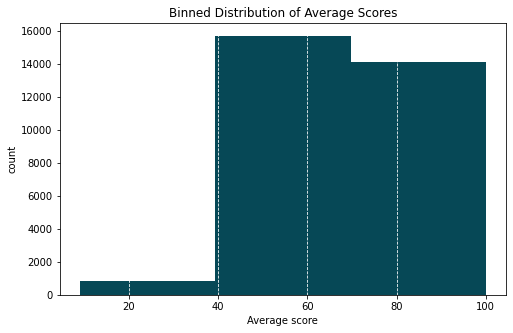

In [23]:
fig, axs = plt.subplots(figsize=(8, 5))
x=df['Total_avg_score'].sort_values()
plt.hist(x, bins=3, color='#064856')
plt.grid(axis='x',color='white',linestyle='--')
plt.xlabel('Average score')
plt.ylabel("count")
plt.title("Binned Distribution of Average Scores")

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Checking how many student scores excellent, good or bad. </h5>

<p>

In [24]:
df['Score_status'].value_counts()

Good         15688
Excellent    14106
Not Good       847
Name: Score_status, dtype: int64

In [25]:
y = df['Score_status'].value_counts()
y

Good         15688
Excellent    14106
Not Good       847
Name: Score_status, dtype: int64

<b>

In [26]:
lebels=df['Score_status'].unique()
x=[lebels[1],lebels[0],lebels[2]]
x

['Good', 'Excellent', 'Not Good']

Text(0.5, 1.0, 'Result of Total student')

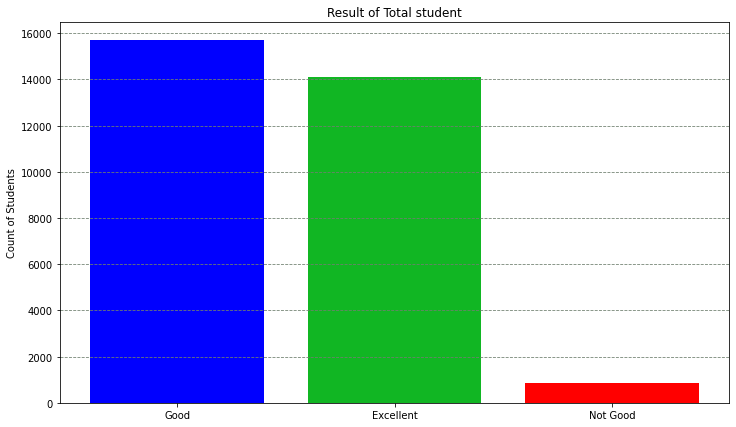

In [27]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x[0], y[0],color='Blue')
ax.bar(x[1], y[1],color='#11b623')
ax.bar(x[2], y[2],color='Red')
plt.grid(axis='y',color='#708070',linestyle='--')
ax.set_ylabel('Count of Students')
ax.set_title('Result of Total student')

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<p>

<h5> Now let's see the result of male and female separately</h5>

For female....

In [29]:
df_female= df[df['Gender']=='female']['Score_status']
df_female.head()

0    Excellent
1    Excellent
2    Excellent
5    Excellent
6    Excellent
Name: Score_status, dtype: category
Categories (3, object): ['Not Good' < 'Good' < 'Excellent']

In [30]:
df_female.value_counts()

Excellent    7877
Good         7214
Not Good      333
Name: Score_status, dtype: int64

In [101]:
df_female.count()

15424

In [31]:
cnt_vl_female=list(df_female.value_counts())
cnt_vl_female

[7877, 7214, 333]

<b>

In [103]:
y_female1=(cnt_vl_female[0]/df_female.count())*100 #Exellent
y_female2=(cnt_vl_female[1]/df_female.count())*100 #Good
y_female3=(cnt_vl_female[2]/df_female.count())*100 #Not Good

For male....

In [34]:
df_male= df[df['Gender']=='male']['Score_status']
df_male.head()

3          Good
4     Excellent
7          Good
8          Good
10         Good
Name: Score_status, dtype: category
Categories (3, object): ['Not Good' < 'Good' < 'Excellent']

In [35]:
df_male.value_counts()

Good         8474
Excellent    6229
Not Good      514
Name: Score_status, dtype: int64

In [36]:
cnt_vl_male=list(df_male.value_counts())
cnt_vl_male

[8474, 6229, 514]

In [102]:
df_male.count()

15217

In [104]:
y_male1=(cnt_vl_male[1]/df_male.count())*100 #Exellent
y_male2=(cnt_vl_male[0]/df_male.count())*100 #Good
y_male3=(cnt_vl_male[2]/df_male.count())*100 #Not Good

In [33]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

The plot........

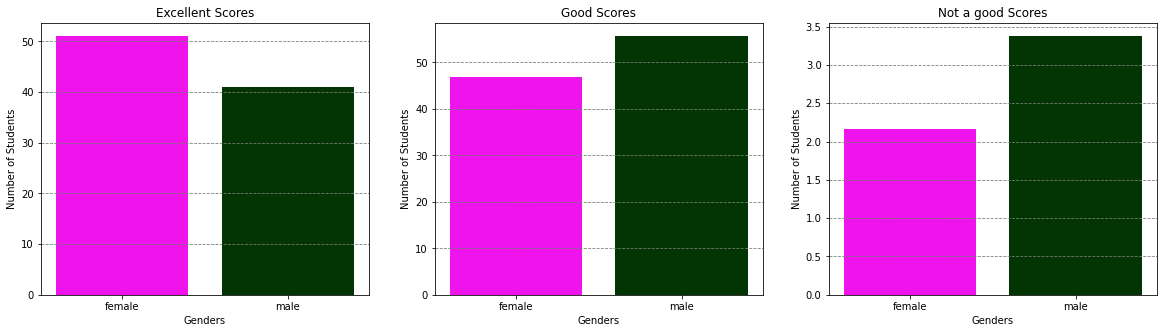

In [113]:
x_lebel= df['Gender'].unique()

fig, axes = plt.subplots(1, 3, figsize=(20,5),)

axes[0].bar(x_lebel[0], y_female1,color='#ef14eb')
axes[0].bar(x_lebel[1], y_male1,color='#033504' )
axes[0].set_xlabel('Genders')
axes[0].set_ylabel('Number of Students')
axes[0].set_title('Excellent Scores')
# axes[0].set_ylim(0,100)
axes[0].grid(axis='y',color='#708070',linestyle='--')

axes[1].bar(x_lebel[0],y_female2,color='#ef14eb')
axes[1].bar(x_lebel[1],y_male2,color='#033504')
axes[1].set_xlabel('Genders')
axes[1].set_ylabel('Number of Students')
axes[1].set_title('Good Scores')
# axes[1].set_ylim(0,100)
axes[1].grid(axis='y',color='#708070',linestyle='--')

axes[2].bar(x_lebel[0],y_female3,color='#ef14eb')
axes[2].bar(x_lebel[1],y_male3,color='#033504')
axes[2].set_xlabel('Genders')
axes[2].set_ylabel('Number of Students')
axes[2].set_title('Not a good Scores')
# axes[2].set_ylim(0,100)
axes[2].grid(axis='y',color='#708070',linestyle='--')

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Let's see parent's Education and if that effects on theire child </h5>

In [39]:
df['ParentEduc'].value_counts()

some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

In [40]:
dic=dict(df['ParentEduc'].value_counts())
dic
x_ax=list(dic.keys())
y_ax=list(dic.values())

Column chart...

Text(0.5, 1.0, "Result of total studen's parent's Degree.")

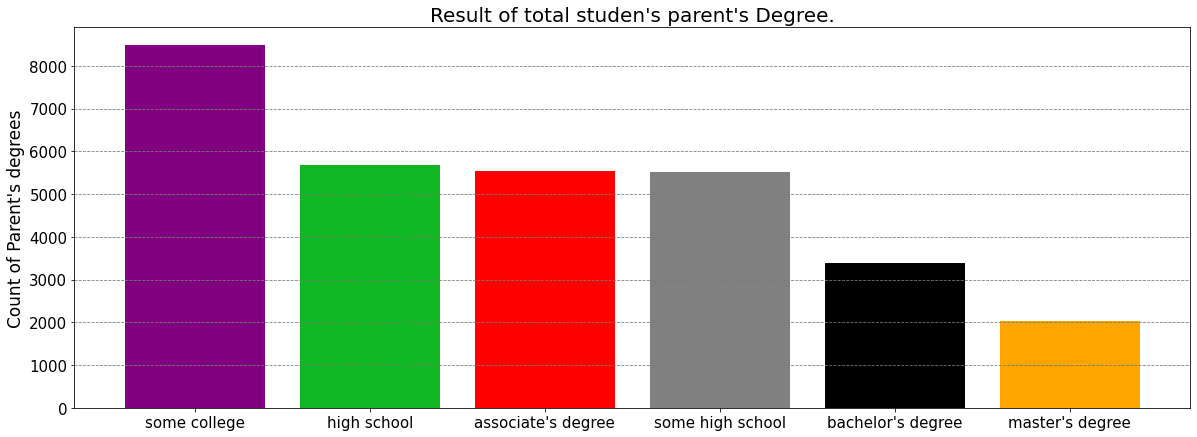

In [41]:
fig, ax = plt.subplots(figsize=(20,7))

ax.bar(x_ax[0], y_ax[0],color='purple')
ax.bar(x_ax[1], y_ax[1],color='#11b623')
ax.bar(x_ax[2], y_ax[2],color='Red')
ax.bar(x_ax[3], y_ax[3],color='grey')
ax.bar(x_ax[4], y_ax[4],color='black')
ax.bar(x_ax[5], y_ax[5],color='orange')
ax.tick_params(axis='both', labelsize=15)

plt.grid(axis='y',color='#708070',linestyle='--')

ax.set_ylabel("Count of Parent's degrees",fontsize=17)
ax.set_title('Result of total studen\'s parent\'s Degree.',fontsize=20)

Pie chart...

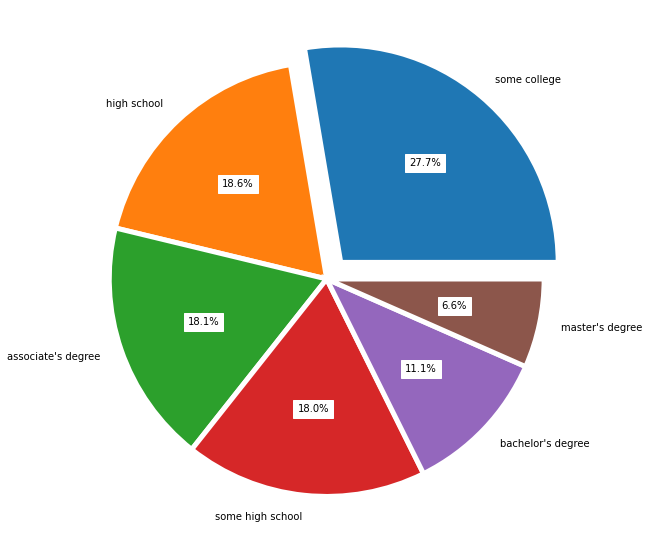

In [42]:
largest_index = y_ax.index(max(y_ax))


explode = [0.1 if i == largest_index else 0 for i in range(len(x_ax))]



plt.figure(figsize=(10, 10)) 
plt.pie(y_ax, labels = x_ax, autopct='%1.1f%%',explode=explode, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


In [43]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'Total_avg_score', 'Score_status'],
      dtype='object')

In [44]:
df['ParentEduc'].value_counts()

some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

<p>

<p>

<p>

<h4> Parent education: <i> "some college"

In [45]:
parenteduc_scollege = df[df['ParentEduc'] == 'some college']['Score_status']
parenteduc_scollege_dict=dict(parenteduc_scollege.value_counts())
parenteduc_scollege_dict

{'Good': 4353, 'Excellent': 3900, 'Not Good': 225}

In [46]:
X1=list(parenteduc_scollege_dict.keys())
Y1=list(parenteduc_scollege_dict.values())
X1,Y1

(['Good', 'Excellent', 'Not Good'], [4353, 3900, 225])

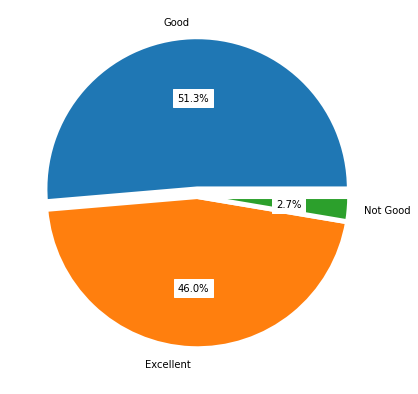

In [47]:
largest_index = Y1.index(max(Y1))


explode1 = [0.05 if o == largest_index else 0 for o in range(len(X1))]

plt.figure(figsize=(7, 7)) 
plt.pie(Y1, labels = X1, autopct='%1.1f%%',explode=explode1, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()


<h4> Parent education: <i> "high school"

In [48]:
parenteduc_highschool = df[df['ParentEduc'] == 'high school']['Score_status']
parenteduc_highschool_dict=dict(parenteduc_highschool.value_counts())
parenteduc_highschool_dict

{'Good': 3258, 'Excellent': 2241, 'Not Good': 188}

In [49]:
X2=list(parenteduc_highschool_dict.keys())
Y2=list(parenteduc_highschool_dict.values())
X2,Y2

(['Good', 'Excellent', 'Not Good'], [3258, 2241, 188])

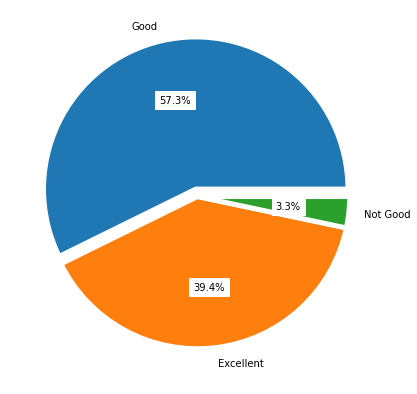

In [50]:
largest_inde2 = Y2.index(max(Y2))


explode2 = [0.05 if p == largest_index else 0 for p in range(len(X2))]
explode2
plt.figure(figsize=(7, 7)) 
plt.pie(Y2, labels = X2, autopct='%1.1f%%',explode=explode2, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<h4> Parent education: <i> "associate's degree"

In [51]:
parenteduc_assodegree = df[df['ParentEduc'] == "associate's degree"]['Score_status']
parenteduc_assodegree_dict=dict(parenteduc_assodegree.value_counts())
parenteduc_assodegree_dict

{'Excellent': 2796, 'Good': 2650, 'Not Good': 104}

In [52]:
X3=list(parenteduc_assodegree_dict.keys())
Y3=list(parenteduc_assodegree_dict.values())
X3,Y3

(['Excellent', 'Good', 'Not Good'], [2796, 2650, 104])

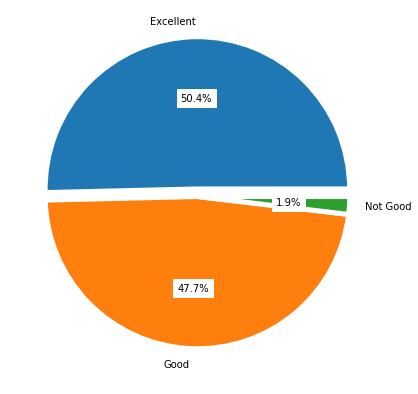

In [53]:
largest_inde3 = Y3.index(max(Y3))


explode3 = [0.05 if j == largest_index else 0 for j in range(len(X3))]
explode3
plt.figure(figsize=(7, 7)) 
plt.pie(Y3, labels = X3, autopct='%1.1f%%',explode=explode3, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<h4> Parent education: <i> "some high school"

In [114]:
parenteduc_shighschool = df[df['ParentEduc'] == 'some high school']['Score_status']
parenteduc_shighschool_dict=dict(parenteduc_shighschool.value_counts())
parenteduc_shighschool_dict

{'Good': 3337, 'Excellent': 1903, 'Not Good': 277}

In [55]:
X4=list(parenteduc_shighschool_dict.keys())
Y4=list(parenteduc_shighschool_dict.values())
X4,Y4

(['Good', 'Excellent', 'Not Good'], [3337, 1903, 277])

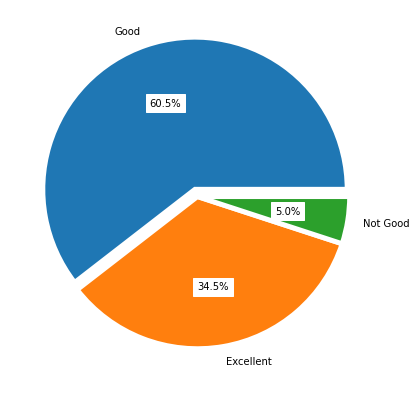

In [56]:
largest_inde4 = Y4.index(max(Y4))


explode4 = [0.05 if k == largest_index else 0 for k in range(len(X4))]
explode4
plt.figure(figsize=(7, 7)) 
plt.pie(Y4, labels = X4, autopct='%1.1f%%',explode=explode4, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<h4> Parent education: <i> "bachelor's degree"

In [57]:
parenteduc_bachdegree = df[df['ParentEduc'] == "bachelor's degree"]['Score_status']
parenteduc_bachdegree_dict=dict(parenteduc_bachdegree.value_counts())
parenteduc_bachdegree_dict

{'Excellent': 1962, 'Good': 1386, 'Not Good': 38}

In [58]:
X5=list(parenteduc_bachdegree_dict.keys())
Y5=list(parenteduc_bachdegree_dict.values())
X5,Y5

(['Excellent', 'Good', 'Not Good'], [1962, 1386, 38])

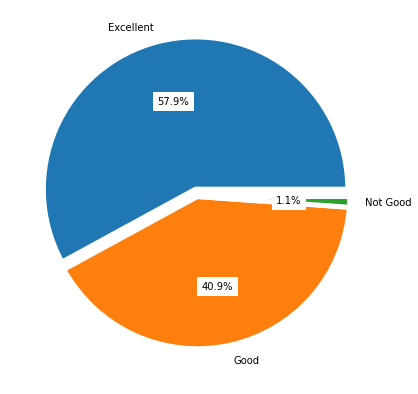

In [59]:
largest_inde5 = Y5.index(max(Y5))


explode5 = [0.05 if l == largest_index else 0 for l in range(len(X5))]
explode5
plt.figure(figsize=(7, 7)) 
plt.pie(Y5, labels = X5, autopct='%1.1f%%',explode=explode5, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<h4> Parent education: <i> "master's degree"

In [115]:
parenteduc_mdegree = df[df['ParentEduc'] == "master's degree"]['Score_status']
parenteduc_mdegree_dict=dict(parenteduc_mdegree.value_counts())
parenteduc_mdegree_dict

{'Excellent': 1304, 'Good': 704, 'Not Good': 15}

In [61]:
X6=list(parenteduc_mdegree_dict.keys())
Y6=list(parenteduc_mdegree_dict.values())
X6,Y6

(['Excellent', 'Good', 'Not Good'], [1304, 704, 15])

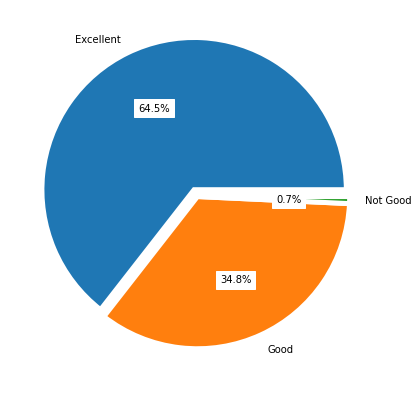

In [62]:
largest_inde6 = Y6.index(max(Y6))


explode6 = [0.05 if m == largest_index else 0 for m in range(len(X6))]
explode6
plt.figure(figsize=(7, 7)) 
plt.pie(Y6, labels = X6, autopct='%1.1f%%',explode=explode6, textprops={'color': 'black', 'backgroundcolor': 'white'},wedgeprops={'linewidth': 5, 'edgecolor': 'White'})
plt.show()

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Checking the three catagories of result based on parent's education

In [63]:
parenteduc_scollege_dict  #some school
# parenteduc_highschool_dict  #high school
# parenteduc_assodegree_dict # associat's degree
# parenteduc_shighschool_dict # some high school
# parenteduc_bachdegree_dict # bachelor's degree
# parenteduc_mdegree_dict # master's degree

{'Good': 4353, 'Excellent': 3900, 'Not Good': 225}

In [64]:
x_axis=list(df['ParentEduc'].unique())
x_axis

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [65]:
# X1,Y1 #some college
# X2,Y2 #high school
# X3,Y3 # associat's degree
# X4,Y4 # some high school
# X5,Y5 # bachelor's degree
# X6,Y6 # master's degree
X4,Y4

(['Good', 'Excellent', 'Not Good'], [3337, 1903, 277])

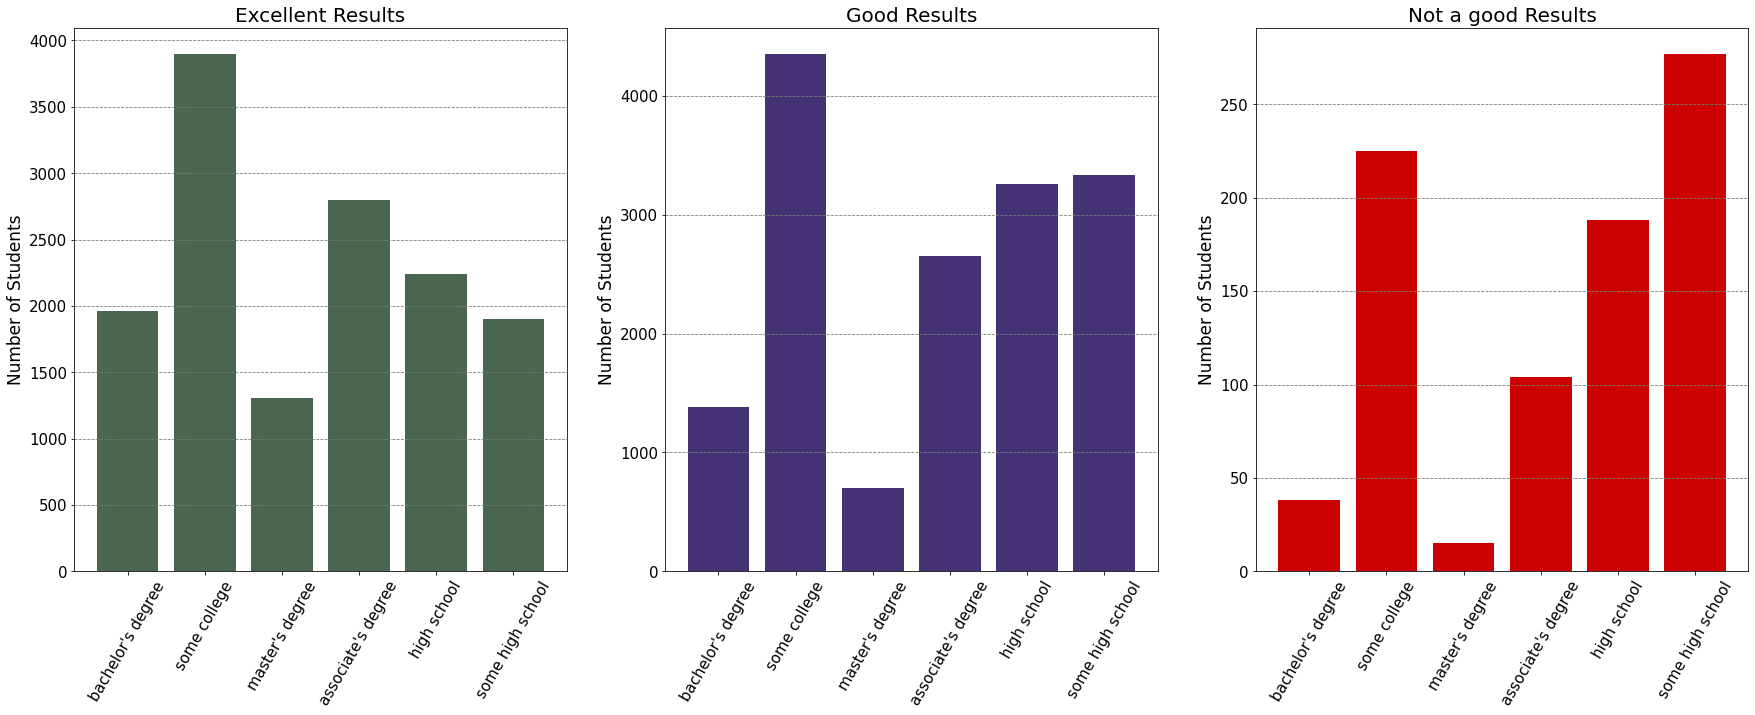

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(30,10),)

axes[0].bar(x_axis[0], Y5[0],color='#4A6650')
axes[0].bar(x_axis[1], Y1[1],color='#4A6650' )
axes[0].bar(x_axis[2], Y6[0],color='#4A6650' )
axes[0].bar(x_axis[3], Y3[0],color='#4A6650' )
axes[0].bar(x_axis[4], Y2[1],color='#4A6650' )
axes[0].bar(x_axis[5], Y4[1],color='#4A6650' )
axes[0].set_ylabel('Number of Students',fontsize=17)
axes[0].set_title('Excellent Results',fontsize=20)
axes[0].grid(axis='y',color='#708070',linestyle='--')
axes[0].set_xticks(range(len(x_axis)))  # Set the x-axis tick positions
axes[0].set_xticklabels(x_axis, rotation=60) 
axes[0].tick_params(axis='both', which='major', labelsize=15)


axes[1].bar(x_axis[0], Y5[1],color='#463376')
axes[1].bar(x_axis[1], Y1[0],color='#463376' )
axes[1].bar(x_axis[2], Y6[1],color='#463376' )
axes[1].bar(x_axis[3], Y3[1],color='#463376' )
axes[1].bar(x_axis[4], Y2[0],color='#463376' )
axes[1].bar(x_axis[5], Y4[0],color='#463376' )
axes[1].set_ylabel('Number of Students',fontsize=17)
axes[1].set_title('Good Results',fontsize=20)
axes[1].grid(axis='y',color='#708070',linestyle='--')
axes[1].set_xticks(range(len(x_axis)))  # Set the x-axis tick positions
axes[1].set_xticklabels(x_axis, rotation=60) 
axes[1].tick_params(axis='both', which='major', labelsize=15)

axes[2].bar(x_axis[0], Y5[2],color='#cc0000')
axes[2].bar(x_axis[1], Y1[2],color='#cc0000' )
axes[2].bar(x_axis[2], Y6[2],color='#cc0000' )
axes[2].bar(x_axis[3], Y3[2],color='#cc0000' )
axes[2].bar(x_axis[4], Y2[2],color='#cc0000' )
axes[2].bar(x_axis[5], Y4[2],color='#cc0000' )
axes[2].set_ylabel('Number of Students',fontsize=17)
axes[2].set_title('Not a good Results',fontsize=20)
axes[2].grid(axis='y',color='#708070',linestyle='--')
axes[2].set_xticks(range(len(x_axis)))  # Set the x-axis tick positions
axes[2].set_xticklabels(x_axis, rotation=60) 
axes[2].tick_params(axis='both', which='major', labelsize=15)


<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Checking the result of male and female based on theire study hour.

In [67]:
x_ax

['some college',
 'high school',
 "associate's degree",
 'some high school',
 "bachelor's degree",
 "master's degree"]

In [68]:
Exl_female_studey = df[(df["Gender"] == 'female') & (df['Score_status'] == 'Excellent')]
Exl_female_studey['WklyStudyHours'].value_counts()

5-10    4527
< 5     1935
> 10    1415
Name: WklyStudyHours, dtype: int64

In [69]:
y_value_female=list(Exl_female_studey['WklyStudyHours'].value_counts())
y_value_female

[4527, 1935, 1415]

In [70]:
Exl_male_studey = df[(df["Gender"] == 'male') & (df['Score_status'] == 'Excellent')]
Exl_male_studey['WklyStudyHours'].value_counts()

5-10    3501
< 5     1529
> 10    1199
Name: WklyStudyHours, dtype: int64

In [71]:
y_value=list(Exl_male_studey['WklyStudyHours'].value_counts())
y_value

[3501, 1529, 1199]

In [72]:
x_value=['Between 5 to 10hrs','Less than 5 hrs','More than 10hrs']

<h6> Excellent result's plot of male and female

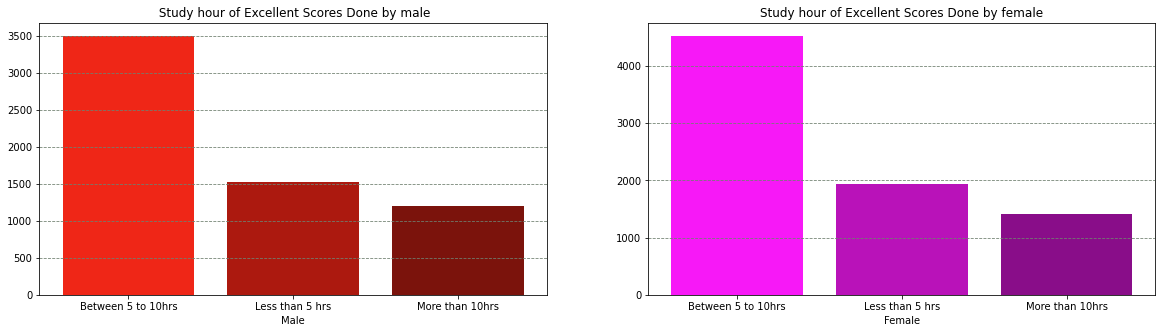

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),)

axes[0].bar(x_value[0], y_value[0],color='#ef2617')
axes[0].bar(x_value[1], y_value[1],color='#ac190f' )
axes[0].bar(x_value[2], y_value[2],color='#7b130c' )
axes[0].set_xlabel('Male')
axes[0].set_title(' Study hour of Excellent Scores Done by male')
axes[0].grid(axis='y',color='#708070',linestyle='--')

axes[1].bar(x_value[0],y_value_female[0],color='#f718f7')
axes[1].bar(x_value[1],y_value_female[1],color='#b912b9')
axes[1].bar(x_value[2],y_value_female[2],color='#890d89')
axes[1].set_xlabel('Female')
axes[1].set_title('Study hour of Excellent Scores Done by female')
axes[1].grid(axis='y',color='#708070',linestyle='--')

In [74]:
Wor_female_studey = df[(df["Gender"] == 'female') & (df['Score_status'] == 'Not Good')]
Wor_female_studey['WklyStudyHours'].value_counts()

5-10    166
< 5     121
> 10     46
Name: WklyStudyHours, dtype: int64

In [75]:
y_value_female2=list(Wor_female_studey['WklyStudyHours'].value_counts())
y_value_female2

[166, 121, 46]

In [76]:
Wor_male_studey = df[(df["Gender"] == 'male') & (df['Score_status'] == 'Not Good')]
Wor_male_studey['WklyStudyHours'].value_counts()

5-10    284
< 5     152
> 10     78
Name: WklyStudyHours, dtype: int64

In [77]:
y_value_male2=list(Wor_male_studey['WklyStudyHours'].value_counts())
y_value_male2

[284, 152, 78]

In [78]:
x_value=['Between 5 to 10hrs','Less than 5 hrs','More than 10hrs']

<h6> Bad result's plot of male and female

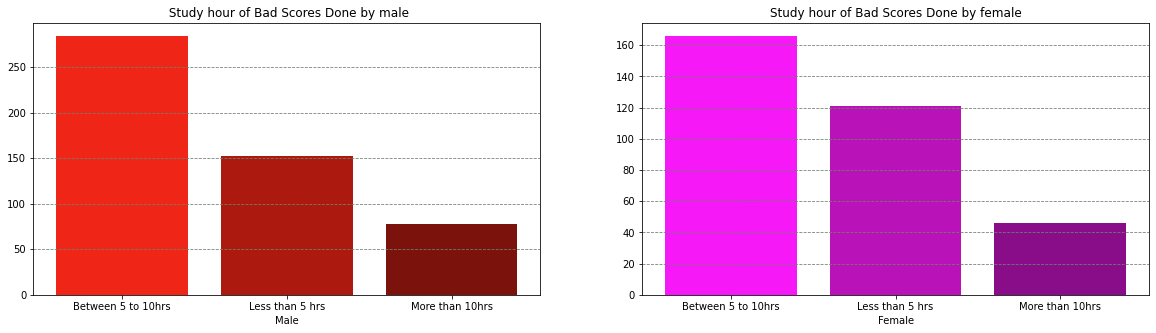

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),)

axes[0].bar(x_value[0], y_value_male2[0],color='#ef2617')
axes[0].bar(x_value[1], y_value_male2[1],color='#ac190f' )
axes[0].bar(x_value[2], y_value_male2[2],color='#7b130c' )
axes[0].set_xlabel('Male')
axes[0].set_title(' Study hour of Bad Scores Done by male')
axes[0].grid(axis='y',color='#708070',linestyle='--')

axes[1].bar(x_value[0],y_value_female2[0],color='#f718f7')
axes[1].bar(x_value[1],y_value_female2[1],color='#b912b9')
axes[1].bar(x_value[2],y_value_female2[2],color='#890d89')
axes[1].set_xlabel('Female')
axes[1].set_title('Study hour of Bad Scores Done by female')
axes[1].grid(axis='y',color='#708070',linestyle='--')

<style>
  hr {
    height: 5px; /* Adjust the desired thickness of the line */
    background-color: black; /* Set the color of the line to black */
    border: 1px solid black; /* Add a border with a thickness of 1px and black color */
    margin: 10px 0; /* Adjust the margin around the line */
  }
</style>

<hr>


<h5> Analyzing the result by test preparetion 

In [80]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'Total_avg_score', 'Score_status'],
      dtype='object')

In [81]:
test_prep_label= list(df['TestPrep'].unique())
test_prep_label

['none', 'completed']

In [82]:
total_test_prep_none=df[df['TestPrep']=='none']['Score_status']
ex_test_prep_none=df[(df['TestPrep']=='none')&(df['Score_status']=='Excellent')]['Score_status']
gd_test_prep_none=df[(df['TestPrep']=='none')&(df['Score_status']=='Good')]['Score_status']
bd_test_prep_none=df[(df['TestPrep']=='none')&(df['Score_status']=='Not Good')]['Score_status']

In [83]:
total_test_prep_complet=df[df['TestPrep']=='completed']['Score_status']
ex_test_prep_complet=df[(df['TestPrep']=='completed')&(df['Score_status']=='Excellent')]['Score_status']
gd_test_prep_complet=df[(df['TestPrep']=='completed')&(df['Score_status']=='Good')]['Score_status']
bd_test_prep_complet=df[(df['TestPrep']=='completed')&(df['Score_status']=='Not Good')]['Score_status']

In [84]:
ex_ratio_none=(ex_test_prep_none.count()/total_test_prep_none.count())*100
gd_ratio_none=(gd_test_prep_none.count()/total_test_prep_none.count())*100
bd_ratio_none=(bd_test_prep_none.count()/total_test_prep_none.count())*100

In [85]:
ex_ratio_complet=(ex_test_prep_complet.count()/total_test_prep_complet.count())*100
gd_ratio_complet=(gd_test_prep_complet.count()/total_test_prep_complet.count())*100
bd_ratio_complet=(bd_test_prep_complet.count()/total_test_prep_complet.count())*100

(0.0, 100.0)

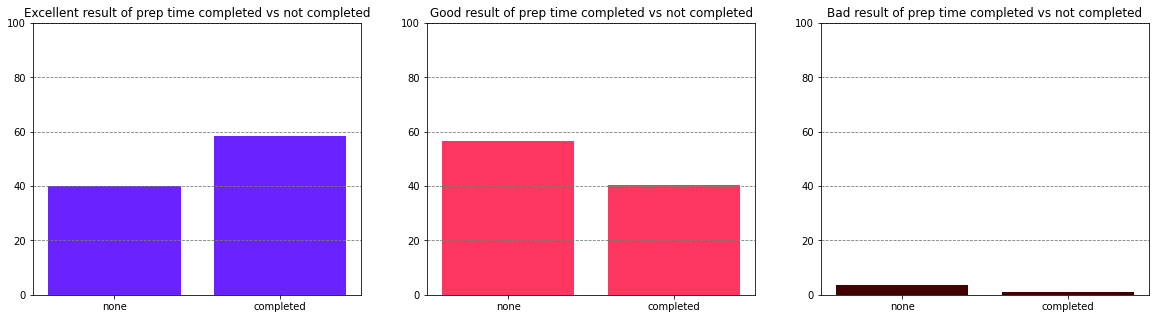

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].bar(test_prep_label[0], ex_ratio_none,color='#6A22FF')
axes[0].bar(test_prep_label[1], ex_ratio_complet,color='#6A22FF' )
axes[0].set_title('Excellent result of prep time completed vs not completed')
axes[0].grid(axis='y',color='#708070',linestyle='--')
axes[0].set_ylim(0,100)

axes[1].bar(test_prep_label[0],gd_ratio_none,color='#FF3660')
axes[1].bar(test_prep_label[1],gd_ratio_complet,color='#FF3660')
axes[1].set_title('Good result of prep time completed vs not completed')
axes[1].grid(axis='y',color='#708070',linestyle='--')
axes[1].set_ylim(0,100)

axes[2].bar(test_prep_label[0],bd_ratio_none,color='#410000')
axes[2].bar(test_prep_label[1],bd_ratio_complet,color='#410000')
axes[2].set_title('Bad result of prep time completed vs not completed')
axes[2].grid(axis='y',color='#708070',linestyle='--')
axes[2].set_ylim(0,100)

Under progress...........................